In [64]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import pandas as pd

In [66]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [68]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [69]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [70]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [71]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [72]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


## Precipitation Analysis

In [74]:
# Ending data point in the data set
last_dp = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_dp

('2017-08-23')

In [75]:
# Calculate the date 1 year ago from the last data point in the database
start_dp = dt.date(2017,8,23) - dt.timedelta(days=365)
start_dp


datetime.date(2016, 8, 23)

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_dp).\
    order_by(Measurement.date).all()


In [77]:
# Perform a query to retrieve the data and precipitation scores
all_precip = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()


In [78]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_df = pd.DataFrame(precip, columns=["Date", "Precipitation"])
precip_df.set_index("Date", inplace=True,)
precip_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


<function matplotlib.pyplot.show(*args, **kw)>

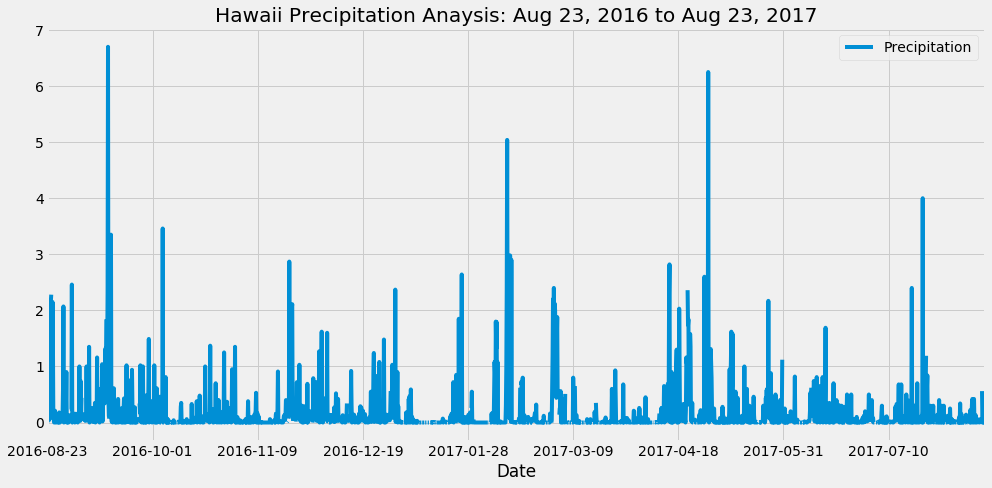

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Hawaii Precipitation Anaysis: Aug 23, 2016 to Aug 23, 2017", figsize=(14,7))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("Images/1.Precipitation_jmg.png")
plt.show

In [80]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [81]:
# Design a query to show how many stations are available in this dataset?
station_cnt = session.query(Measurement.station).distinct().count()
station_cnt

9

In [82]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity
    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature most active station?
data_pts = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

MinMaxAvg = session.query(*data_pts).filter(Measurement.station == "USC00519281").all()
MinMaxAvg



[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

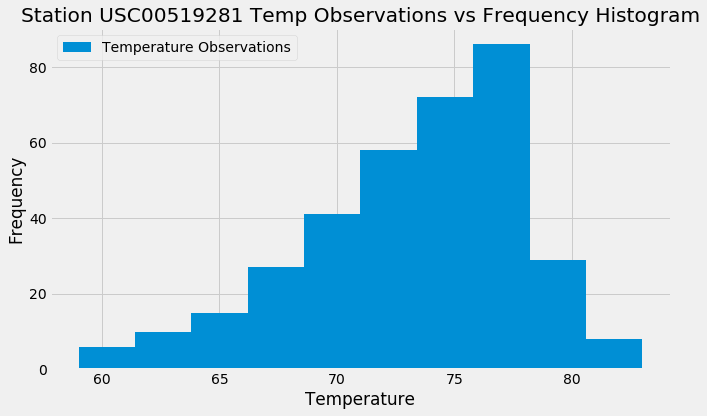

In [84]:
# Choose the station with the highest number of temperature observations. - 'USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_tobs = session.query(Measurement.tobs).filter(Measurement.date >= start_dp).\
    filter(Measurement.station == "USC00519281").order_by(Measurement.date).all()

# Load results into DF
most_tobs_df = pd.DataFrame(most_tobs, columns=["Temperature Observations"])

# Plot the results as a histogram with bins=12
most_tobs_df.plot.hist(title="Station USC00519281 Temp Observations vs Frequency Histogram", figsize=(10,6))
plt.legend(loc='best')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Images/2.TempObservations_vs_Frequency_jmg.png")
plt.show



In [85]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-07-28', '2017-08-03'))
# Using July 28th, 2017 as that was my 10 year wedding anniversary!

[(72.0, 78.94594594594595, 84.0)]


## Optional: My 10 Year Anniversary Trip Temp Analysis

In [86]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
ten_yr_trip = calc_temps('2017-07-28', '2017-08-03')
ten_yr_trip


[(72.0, 78.94594594594595, 84.0)]

<function matplotlib.pyplot.show(*args, **kw)>

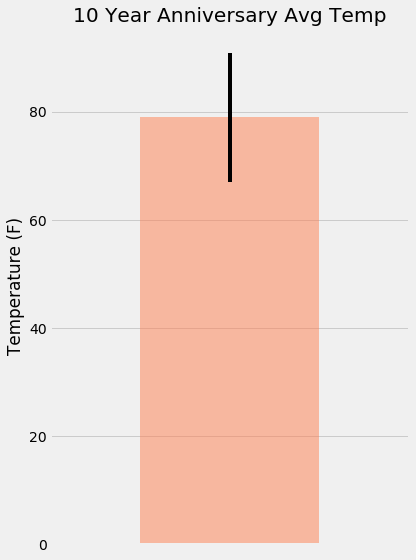

In [87]:
# Load the Results as a Pandas DataFrame
ten_yr_trip_df = pd.DataFrame(ten_yr_trip, columns=["tmin", "tavg", "tmax"])

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

ten_yr_trip_df.plot.bar(y="tavg", yerr=(ten_yr_trip_df["tmax"] - ten_yr_trip_df["tmin"]),
                        title="10 Year Anniversary Avg Temp", color="coral",
                        alpha=0.5, figsize=(6,8), legend=None)
plt.xticks([])
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.savefig("Images/3.10yr_Anniversary_Trip_avgTemp_jmg.png")
plt.show

